# Book Recommendation System

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ7X2bevmTrTxbHsXSstQwbQmJKOvD4NUGKV_GXcg86NQ2iIYHL&usqp=CAU" width="500" align="center">

### Importing the required libraries

In [1]:
import pandas as pd                   #Dataframe manipulation and analysis library
from math import sqrt                 #Math function
import numpy as np                    #Package for scientific computing
import matplotlib.pyplot as plt       #Data visualization 
%matplotlib inline

In [2]:
import matplotlib.cm as cm           #Required for colormap

In [3]:
!pip install pywaffle                #Installing pywaffle

In [4]:
from pywaffle import Waffle    #For waffle chart

In [5]:
ratings_df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')   #Dataset for ratings
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [6]:
ratings_df.shape    #Dimensions of ratings dataframe

(5976479, 3)

In [7]:
want_to_read_df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv')    #Dataset for wishlist
want_to_read_df.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [8]:
want_to_read_df.shape    #Dimensions of wishlist dataframe

(912705, 2)

In [9]:
books_df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')   #Dataset for books
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [10]:
books_df.shape    #Dimensions of books dataframe

(10000, 23)

#### Data wrangling

In [11]:
books_df['original_title'].fillna(value = books_df['title'], inplace = True)    #Filling the missing books' original titles with titles

In [12]:
books_df = books_df.drop(['goodreads_book_id', 'best_book_id','work_id', 'books_count', 'title', 'ratings_count','work_ratings_count','work_text_reviews_count'], axis = 1)          #Dropping the columns that are no longer required
books_df.head()

,book_id,isbn,isbn13,authors,original_publication_year,original_title,language_code,average_rating,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,en-US,3.57,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
books_df.rename(columns={'original_title':'title'}, inplace = True)     #To rename a column in the books dataframe

## Top 15 books

In [14]:
top15_df = books_df.copy()
top15_df = top15_df.sort_values(by= ['average_rating','ratings_5'], ascending = False).head(15)     #Sorts books in the descending order of their popularity

#### Top 15 books, based on Ratings, and number of 5 star ratings.

In [15]:
top15_df=top15_df.reset_index()
top15 = top15_df['title'].to_list()
top15_df

,index,book_id,isbn,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,3627,3628,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,eng,4.82,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
1,861,862,765326361,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,eng,4.77,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
2,3274,3275,439682584,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3,7946,7947,1433502410,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,ESV Study Bible,eng,4.76,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...
4,8853,8854,842339523,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,en-US,4.76,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
5,4482,4483,836221362,9.780836e+12,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,eng,4.75,36,57,850,3737,18749,https://images.gr-assets.com/books/1437420710m...,https://images.gr-assets.com/books/1437420710s...
6,421,422,545044251,9.780545e+12,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,eng,4.74,1105,1285,7020,30666,164049,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
7,6360,6361,836213122,9.780836e+12,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,eng,4.74,22,69,680,2822,13692,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8,3752,3753,439827604,9.780440e+12,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",eng,4.73,203,186,946,3891,21048,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...
9,6589,6590,751507954,9.780752e+12,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,eng,4.73,20,61,701,3295,14121,https://images.gr-assets.com/books/1391114055m...,https://images.gr-assets.com/books/1391114055s...


### Graphical visualization of the data

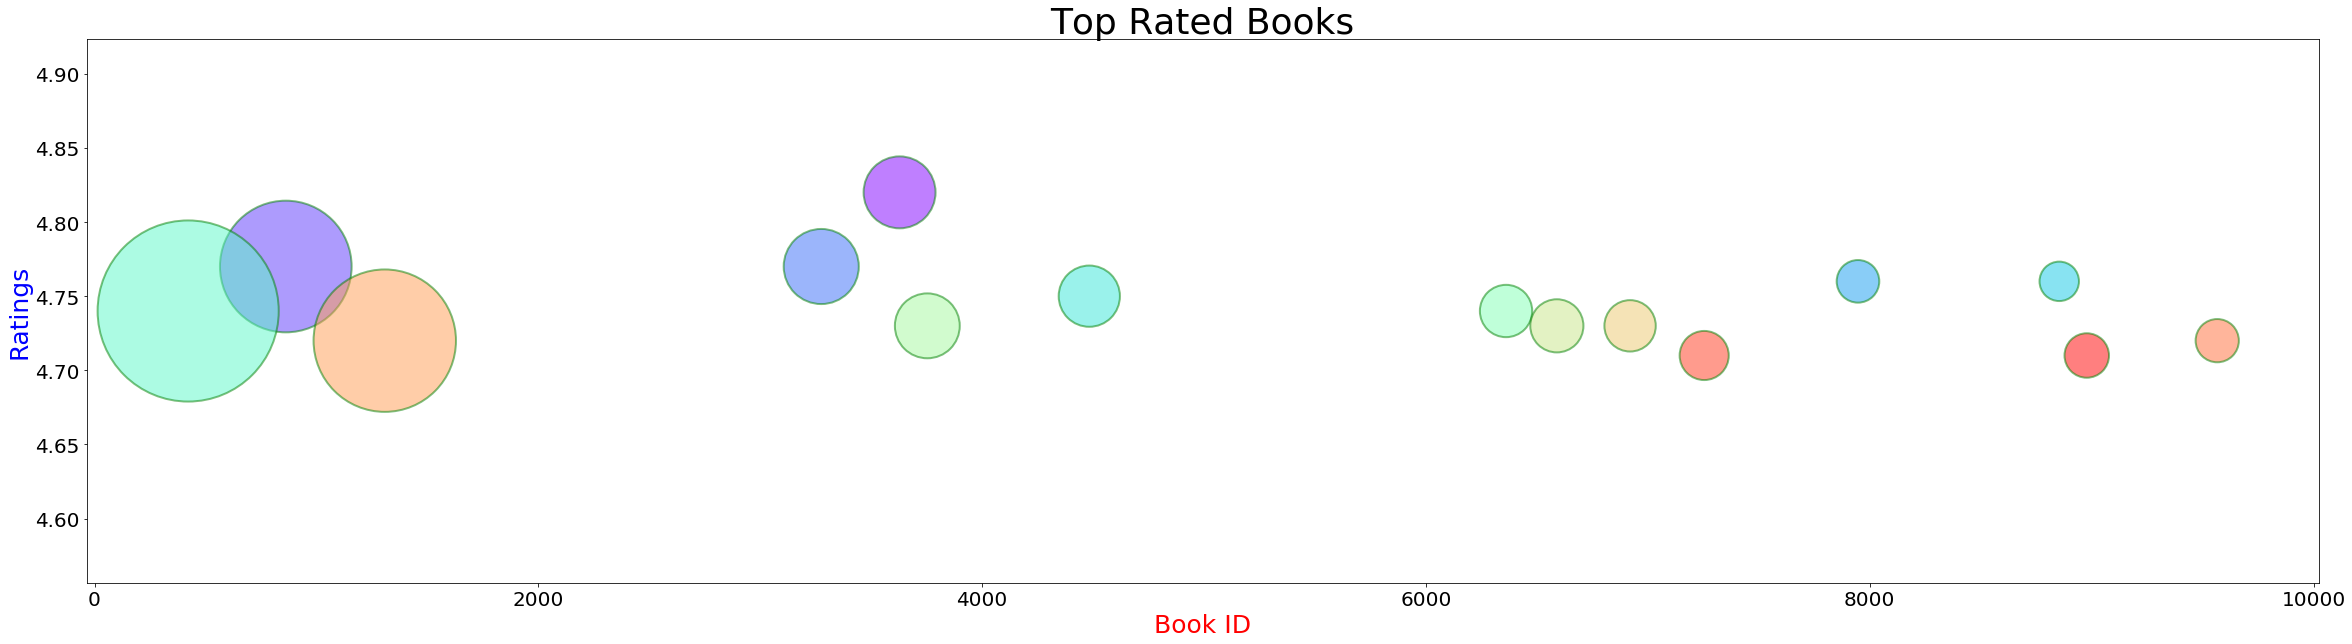

In [16]:
colors = cm.rainbow(np.linspace(0, 1, len(top15_df['title'])))
x = top15_df['book_id']
y = top15_df['average_rating']
z = top15_df['ratings_5']
 
plt.figure(figsize = (40,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Top Rated Books", fontsize = 36)
plt.xlabel("Book ID", fontsize=25, color='red')
plt.ylabel("Ratings",fontsize=25, color='blue')
#Using the scatter function, and generating bubble plot
plt.scatter(x, y, s=z/5, c=colors, alpha=0.5, edgecolors="green", linewidth=2)

plt.show()

### Top 15 books

In [17]:
top15     #List of top 15 books

['The Complete Calvin and Hobbes',
 'Words of Radiance',
 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
 'ESV Study Bible',
 'Mark of the Lion Trilogy',
 "It's a Magical World: A Calvin and Hobbes Collection",
 'Complete Harry Potter Boxed Set',
 "There's Treasure Everywhere: A Calvin and Hobbes Collection",
 'Harry Potter Collection (Harry Potter, #1-6)',
 'The Authoritative Calvin and Hobbes',
 'The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury',
 'A Court of Mist and Fury',
 'Attack of the Deranged Mutant Killer Monster Snow Goons: A Calvin and Hobbes Collection',
 'Homicidal Psycho Jungle Cat: A Calvin and Hobbes Collection',
 'The Revenge of the Baby-Sat: A Calvin and Hobbes Collection']

## Top 15 trending books

In [18]:
trending_df = want_to_read_df.groupby('book_id').agg('count').reset_index()  #Counting the number of people interested in reading each book
trending_df.columns = ['book_id',"count of people who're interested"]
trending_df = (trending_df.sort_values(by = ["count of people who're interested"], ascending=False)).head(15) #Sorting the dataframe in descending order
trending_df

,book_id,count of people who're interested
46,47,2772
142,143,1967
112,113,1840
12,13,1812
10,11,1767
44,45,1717
138,139,1650
38,39,1619
64,65,1608
34,35,1576


In [19]:
trending_df = pd.merge(trending_df, books_df, left_on= 'book_id', right_on= 'book_id')     #Merging trending_df and books_df
trending = trending_df['title'].to_list()

#### Top 15 trending books, based on the wishlist of other readers

In [20]:
trending_df 

,book_id,count of people who're interested,isbn,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,47,2772,375831002,9.780376e+12,Markus Zusak,2005.0,The Book Thief,eng,4.36,17892,35360,135272,377218,722056,https://images.gr-assets.com/books/1390053681m...,https://images.gr-assets.com/books/1390053681s...
1,143,1967,1476746583,9.781477e+12,Anthony Doerr,2014.0,All the Light We Cannot See,eng,4.31,6209,14527,61020,185239,280832,https://images.gr-assets.com/books/1451445646m...,https://images.gr-assets.com/books/1451445646s...
2,113,1840,684833395,9.780685e+12,Joseph Heller,1961.0,Catch-22,en-US,3.98,20639,37912,106269,186745,230950,https://images.gr-assets.com/books/1463157317m...,https://images.gr-assets.com/books/1463157317s...
3,13,1812,451524934,9.780452e+12,"George Orwell, Erich Fromm, Celâl Üster",1949.0,Nineteen Eighty-Four,eng,4.14,41845,86425,324874,692021,908229,https://images.gr-assets.com/books/1348990566m...,https://images.gr-assets.com/books/1348990566s...
4,11,1767,1594480001,9.781594e+12,Khaled Hosseini,2003.0,The Kite Runner,eng,4.26,34288,59980,226062,628174,929591,https://images.gr-assets.com/books/1484565687m...,https://images.gr-assets.com/books/1484565687s...
5,45,1717,770430074,9.780770e+12,Yann Martel,2001.0,Life of Pi,NaN,3.88,39768,74331,218702,384164,360466,https://images.gr-assets.com/books/1320562005m...,https://images.gr-assets.com/books/1320562005s...
6,139,1650,1594744769,9.781595e+12,Ransom Riggs,2011.0,Miss Peregrine’s Home for Peculiar Children,en-US,3.89,14920,45434,159227,234792,217849,https://images.gr-assets.com/books/1472782916m...,https://images.gr-assets.com/books/1472782916s...
7,39,1619,553588486,9.780554e+12,George R.R. Martin,1996.0,A Game of Thrones,eng,4.45,19988,28983,114092,404583,874574,https://images.gr-assets.com/books/1436732693m...,https://images.gr-assets.com/books/1436732693s...
8,65,1608,385333846,9.780385e+12,Kurt Vonnegut Jr.,1969.0,"Slaughterhouse-Five, or The Children's Crusade...",eng,4.06,24964,45518,152442,300948,367890,https://images.gr-assets.com/books/1440319389m...,https://images.gr-assets.com/books/1440319389s...
9,35,1576,61122416,9.780061e+12,"Paulo Coelho, Alan R. Clarke",1988.0,O Alquimista,eng,3.82,74846,123614,289143,412180,504212,https://images.gr-assets.com/books/1483412266m...,https://images.gr-assets.com/books/1483412266s...


### Horizontal Bar Chart to show the average ratings of top 15 trending books

<BarContainer object of 15 artists>

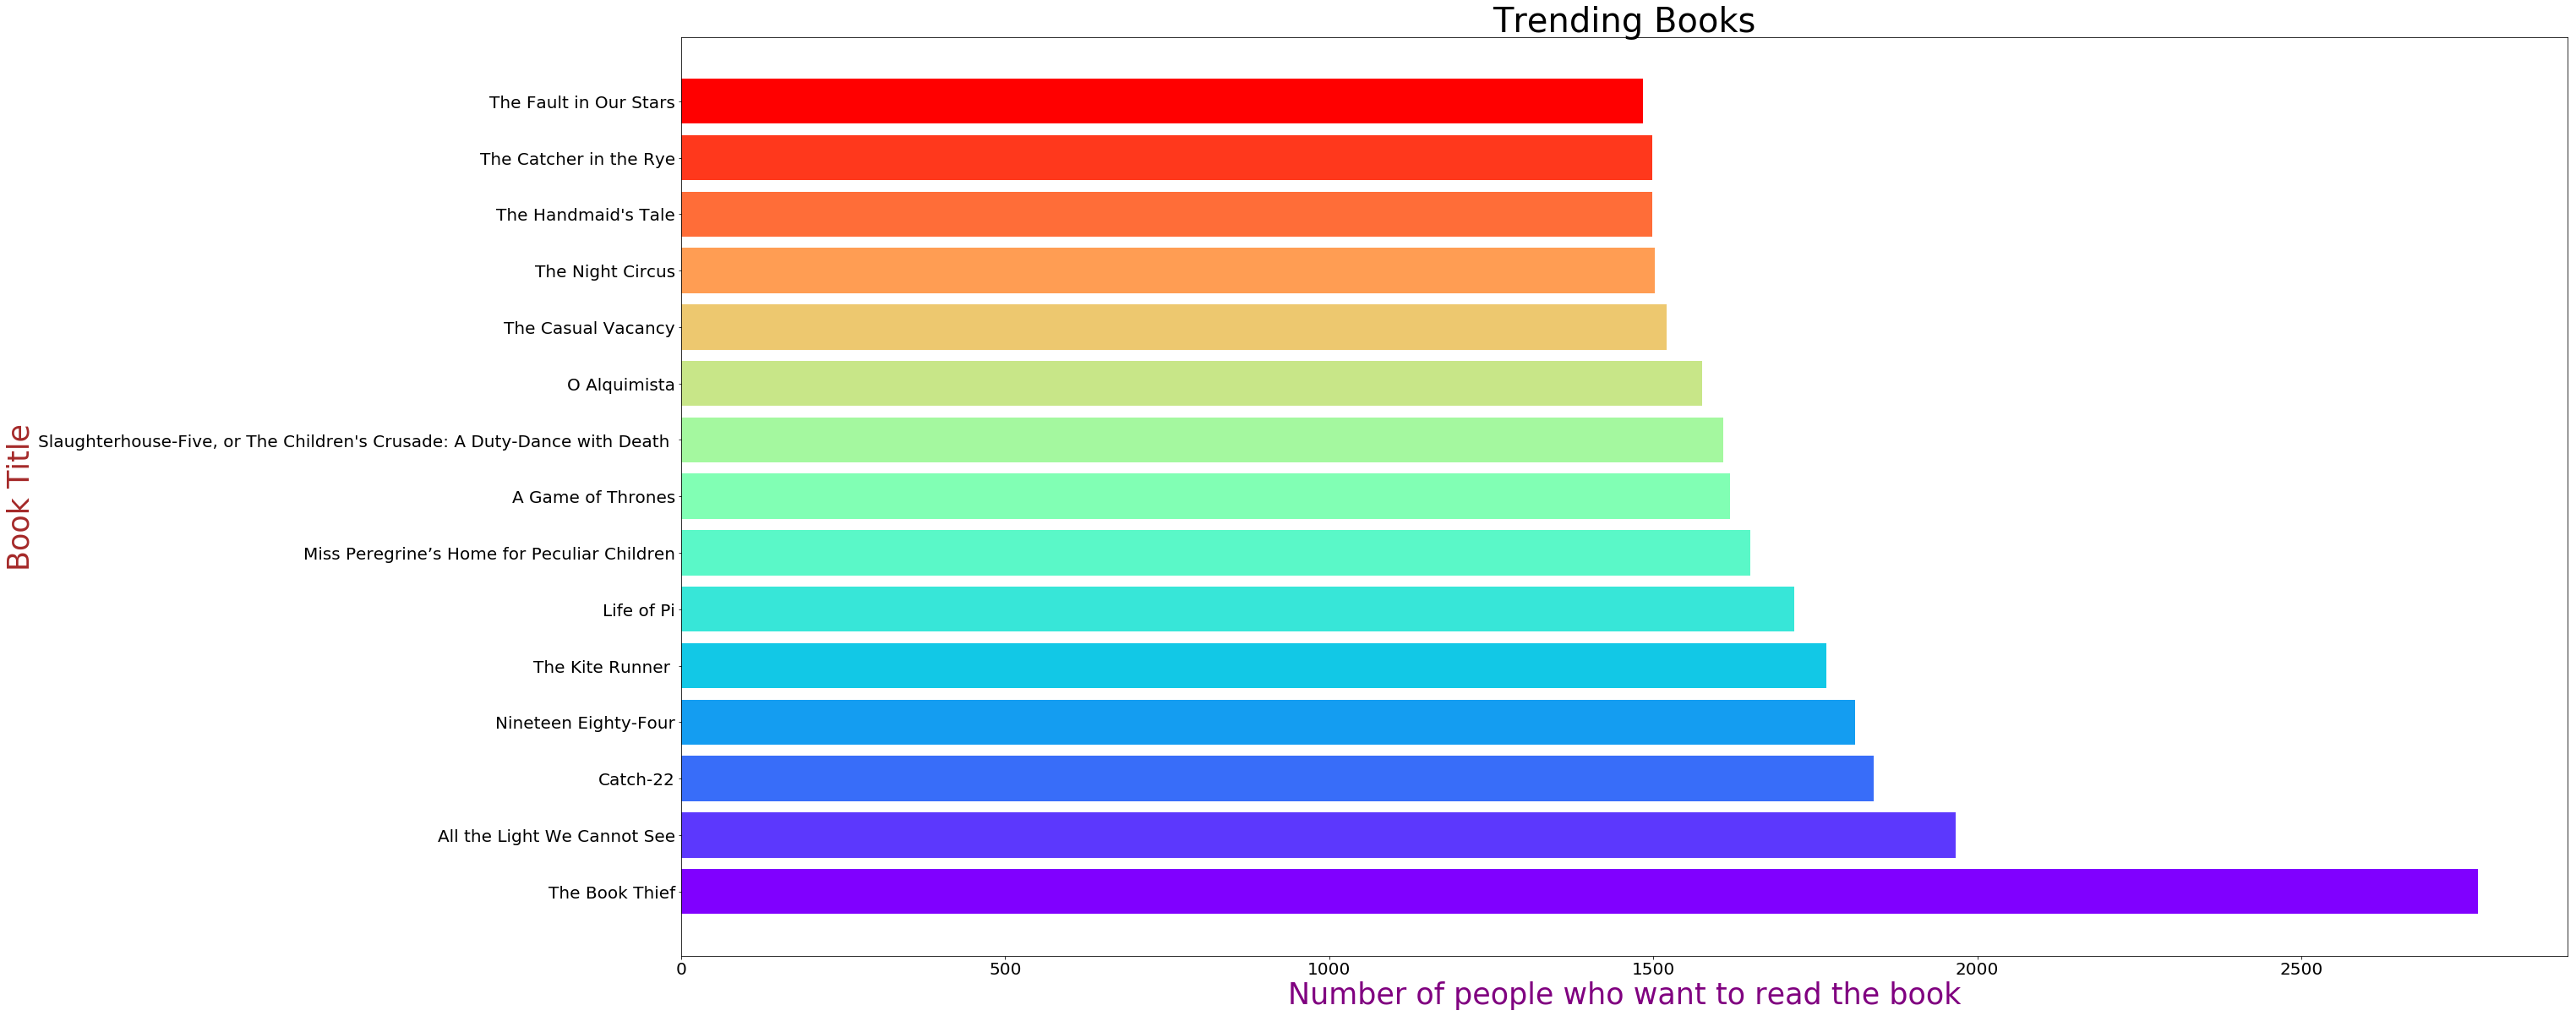

In [21]:
colors = cm.rainbow(np.linspace(0, 1, len(top15_df['title'])))
plt.figure(figsize = (40, 20))
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Number of people who want to read the book", fontsize = 35, color = 'Purple')
plt.ylabel("Book Title", fontsize = 35, color = 'Brown')
plt.title("Trending Books", fontsize = 40)
plt.barh(trending_df['title'], trending_df["count of people who're interested"], color = colors)

### List of top 15 trending books

In [22]:
trending     #List of top trending books

['The Book Thief',
 'All the Light We Cannot See',
 'Catch-22',
 'Nineteen Eighty-Four',
 'The Kite Runner ',
 'Life of Pi',
 'Miss Peregrine’s Home for Peculiar Children',
 'A Game of Thrones',
 "Slaughterhouse-Five, or The Children's Crusade: A Duty-Dance with Death ",
 'O Alquimista',
 'The Casual Vacancy',
 'The Night Circus',
 "The Handmaid's Tale",
 'The Catcher in the Rye',
 'The Fault in Our Stars']

## Please input your preferences

Accepting the titles and ratings of the books that you have read, so as to filter out the right content for you

In [23]:
userInput = [
            {'title':'The Hunger Games', 'rating':4.5},
            {'title':"Harry Potter and the Philosopher's Stone", 'rating':5},
            {'title':"Harry Potter and the Prisoner of Azkaban", 'rating':5},
            {'title':"The Da Vinci Code", 'rating':3},
            {'title':"The First World War", 'rating':3.8},
            ] 
inputBooks = pd.DataFrame(userInput)
inputBooks           #Displays the user's preferences

,rating,title
0,4.5,The Hunger Games
1,5.0,Harry Potter and the Philosopher's Stone
2,5.0,Harry Potter and the Prisoner of Azkaban
3,3.0,The Da Vinci Code
4,3.8,The First World War


In [24]:
#Filtering out the books by title
inputId = books_df[books_df['title'].isin(inputBooks['title'].tolist())]
inputId

#Then merging it so we can get the book_id. It's implicitly merging it by title.
inputBooks = pd.merge(inputId, inputBooks)
inputBooks

#Dropping information we won't use from the inputBooks dataframe
inputBooks = inputBooks.drop(['ratings_1','ratings_2','ratings_3', 'original_publication_year', 'ratings_4','ratings_5'], 1)

#Final inputBooks dataframe
#In case the book you entered is not present, it might not be in the original dataframe or might have been spelled differently.
#You may also check capitalisation.
inputBooks

,book_id,isbn,isbn13,authors,title,language_code,average_rating,image_url,small_image_url,rating
0,1,439023483,9.780439e+12,Suzanne Collins,The Hunger Games,eng,4.34,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,4.5
1,2,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,eng,4.44,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,5.0
2,18,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban,eng,4.53,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,5.0
3,26,307277674,9.780307e+12,Dan Brown,The Da Vinci Code,eng,3.79,https://images.gr-assets.com/books/1303252999m...,https://images.gr-assets.com/books/1303252999s...,3.0
4,10000,375700455,9.780376e+12,John Keegan,The First World War,NaN,4.00,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,3.8


# Content Based Filtering
Learns user's preferences and gives him personalized recommendations.<br>
It does not take into account the views of others.

<img src = "https://miro.medium.com/max/828/1*1b-yMSGZ1HfxvHiJCiPV7Q.png" width="300" align="center">

In [25]:
#Creating a dataframe for authors
authors_df = books_df.copy()
dummy = pd.get_dummies(authors_df.authors)
authors_df = pd.concat([authors_df.book_id, dummy], axis = 1)
authors_df.head()

,book_id,A. Manette Ansay,A. Meredith Walters,"A.A. Milne, Ernest H. Shepard",A.C. Gaughen,A.G. Howard,A.G. Riddle,A.J. Banner,A.J. Jacobs,"A.L. Singer, Walt Disney Company",...,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Filtering out the books from the inputBooks dataframe
userBooks = authors_df[authors_df['book_id'].isin(inputBooks['book_id'].tolist())]
userBooks

,book_id,A. Manette Ansay,A. Meredith Walters,"A.A. Milne, Ernest H. Shepard",A.C. Gaughen,A.G. Howard,A.G. Riddle,A.J. Banner,A.J. Jacobs,"A.L. Singer, Walt Disney Company",...,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,10000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll only need the actual author table, so let's clean this up a bit by resetting the index and dropping the Book ID.

In [27]:
#Resets the index to avoid future issues
userBooks = userBooks.reset_index(drop=True)
#Dropping unnecessary columns to save memory and to avoid issues
userAuthorTable = userBooks.drop('book_id', 1)
userAuthorTable

,A. Manette Ansay,A. Meredith Walters,"A.A. Milne, Ernest H. Shepard",A.C. Gaughen,A.G. Howard,A.G. Riddle,A.J. Banner,A.J. Jacobs,"A.L. Singer, Walt Disney Company",A.M. Homes,...,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we're ready to start learning the input's preferences!

To do this, we're going to turn each author into weights. We can do this by using the input's reviews and multiplying them into the input's author table and then summing up the resulting table by column. This operation is actually a dot product between a matrix and a vector, so we can simply accomplish by calling Pandas's "dot" function.

In [28]:
inputBooks['rating']

0    4.5
1    5.0
2    5.0
3    3.0
4    3.8
Name: rating, dtype: float64

In [29]:
#Dot product to get weights
userProfile = userAuthorTable.transpose().dot(inputBooks['rating'])
#The user profile
userProfile.head()

A. Manette Ansay                 0.0
A. Meredith Walters              0.0
A.A. Milne, Ernest H. Shepard    0.0
A.C. Gaughen                     0.0
A.G. Howard                      0.0
dtype: float64

In [30]:
#Now let's get the authors of every book in our original dataframe
book_by_auth_Table = authors_df.set_index(authors_df['book_id'])
book_by_auth_Table = book_by_auth_Table.drop('book_id', 1)
book_by_auth_Table.head()

,A. Manette Ansay,A. Meredith Walters,"A.A. Milne, Ernest H. Shepard",A.C. Gaughen,A.G. Howard,A.G. Riddle,A.J. Banner,A.J. Jacobs,"A.L. Singer, Walt Disney Company",A.M. Homes,...,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
book_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With the input's profile and the complete list of books and their authors in hand, we're going to take the weighted average of every book based on the input profile and recommend the top twenty books that most satisfy it.

In [31]:
#Multiplying the authors by the weights and then taking the weighted average
recommendationTable_content_df = ((book_by_auth_Table*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_content_df.head()

book_id
1    0.211268
2    0.234742
3    0.000000
4    0.000000
5    0.000000
dtype: float64

In [32]:
#Sorts our recommendations in descending order
recommendationTable_content_df = recommendationTable_content_df.sort_values(ascending=False)
#Let's have a look at the values
recommendationTable_content_df.head()

book_id
25      0.234742
2       0.234742
3275    0.234742
18      0.234742
21      0.234742
dtype: float64

## You may like

In [33]:
#The final recommendation table
final_content_df = books_df.loc[books_df['book_id'].isin(recommendationTable_content_df.head(20).keys())]
final_content_df = final_content_df.reset_index()
final_content = final_content_df['title'].to_list()
final_content_df

,index,book_id,isbn,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,0,1,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,1,2,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,16,17,439023491,9.780439e+12,Suzanne Collins,2009.0,Catching Fire,eng,4.30,10492,48030,262010,687238,980309,https://images.gr-assets.com/books/1358273780m...,https://images.gr-assets.com/books/1358273780s...
3,17,18,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,eng,4.53,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
4,19,20,439023513,9.780439e+12,Suzanne Collins,2010.0,Mockingjay,eng,4.03,30144,110498,373060,618271,738775,https://images.gr-assets.com/books/1358275419m...,https://images.gr-assets.com/books/1358275419s...
5,20,21,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,eng,4.46,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
6,22,23,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,eng,4.37,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
7,23,24,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,eng,4.53,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
8,24,25,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,eng,4.61,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...
9,26,27,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...


### Bar graph to visualize average ratings of the books specially filtered out for you

<BarContainer object of 20 artists>

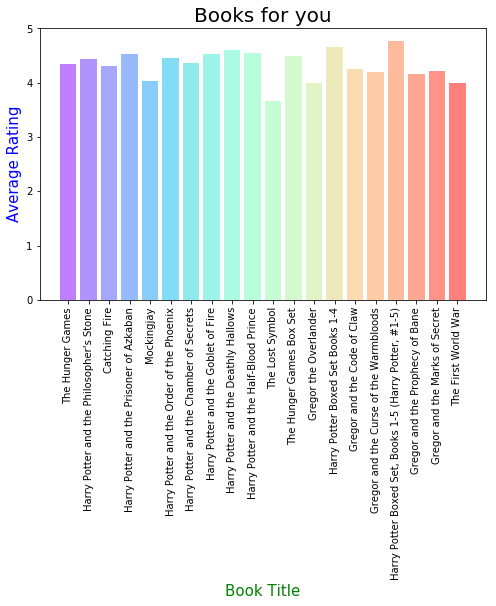

In [34]:
colors = cm.rainbow(np.linspace(0, 1, len(final_content_df['title'])))
plt.figure(figsize = (8,5))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Book Title", fontsize = 15, color = 'Green')
plt.ylabel("Average Rating", fontsize = 15, color = 'Blue')
plt.title("Books for you", fontsize = 20)
plt.bar(final_content_df['title'], final_content_df['average_rating'], color=colors, alpha = 0.5)

#### Calculating the total number of books by different authors that's recommended

In [35]:
final_content_df = final_content_df.groupby('authors').agg('count').reset_index()
final_content_df = final_content_df[['authors','book_id']]
final_content_df.columns = ['Authors','Number of books']
final_content_df

,Authors,Number of books
0,Dan Brown,1
1,"J.K. Rowling, Mary GrandPré",8
2,"J.K. Rowling, Mary GrandPré, Rufus Beck",1
3,John Keegan,1
4,Suzanne Collins,9


### Visualization with the aid of waffle chart

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


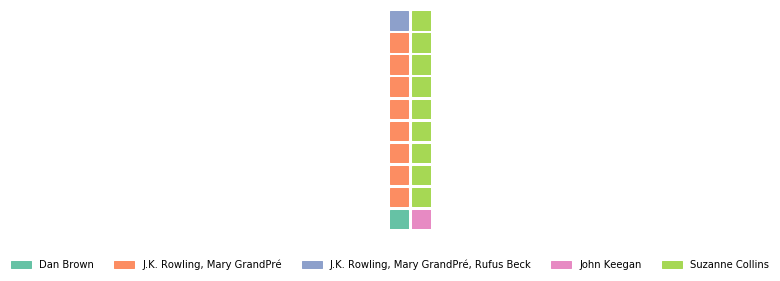

In [36]:
#To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 10,
    values = final_content_df['Number of books'], 
    labels = list(final_content_df['Authors']),
    legend={'loc': 'upper center', 'bbox_to_anchor': (0, -0.1), 'ncol': len(final_content_df['Number of books']), 'framealpha': 0}
)

### List of books suited to your reading interests

In [37]:
final_content   #list of books curated to your interests

['The Hunger Games',
 "Harry Potter and the Philosopher's Stone",
 'Catching Fire',
 'Harry Potter and the Prisoner of Azkaban',
 'Mockingjay',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Deathly Hallows',
 'Harry Potter and the Half-Blood Prince',
 'The Lost Symbol',
 'The Hunger Games Box Set',
 'Gregor the Overlander',
 'Harry Potter Boxed Set Books 1-4',
 'Gregor and the Code of Claw',
 'Gregor and the Curse of the Warmbloods',
 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
 'Gregor and the Prophecy of Bane',
 'Gregor and the Marks of Secret',
 'The First World War']

# User-based Collaborative Filtering
Highly adaptive, also takes other users' ratings into consideration.<br>
However, approximation function can be slow at times.

<img src = "https://image.slidesharecdn.com/presentation-slideshess-289222-090611030307-phpapp02/95/recommender-engines-20-728.jpg?cb=1244689513" width="400" align="center">

In [38]:
#Filtering out users that have read the books that the test case user has read and storing it
userSubset = ratings_df[ratings_df['book_id'].isin(inputBooks['book_id'].tolist())]
userSubset.head()

,user_id,book_id,rating
5,2,26,4
15,4,18,5
18,4,2,5
27,4,26,3
119,9,26,2


In [39]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['user_id'])

In [40]:
#For example, to see the tastes and preferences of the user with user_id = 4, we write
userSubsetGroup.get_group(4)

,user_id,book_id,rating
15,4,18,5
18,4,2,5
27,4,26,3


In [41]:
#Sorting it so users with books most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [42]:
userSubsetGroup[0:3]

[(44206,          user_id  book_id  rating
  3839215    44206        1       3
  3839234    44206    10000       4
  3909896    44206        2       4
  3909904    44206       18       4
  3909916    44206       26       3), (9,         user_id  book_id  rating
  119           9       26       2
  493250        9        2       4
  497862        9       18       5
  828208        9        1       4), (30,          user_id  book_id  rating
  315474        30        2       4
  315477        30       18       4
  315488        30       26       4
  1224259       30        1       4)]

#### Similarity of users to input user
We're going to find out how similar each user is to the input user through the __Pearson Correlation Coefficient__.<br>
In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.

In [43]:
userSubsetGroup = userSubsetGroup[0:100]
userSubsetGroup

[(44206,          user_id  book_id  rating
  3839215    44206        1       3
  3839234    44206    10000       4
  3909896    44206        2       4
  3909904    44206       18       4
  3909916    44206       26       3), (9,         user_id  book_id  rating
  119           9       26       2
  493250        9        2       4
  497862        9       18       5
  828208        9        1       4), (30,          user_id  book_id  rating
  315474        30        2       4
  315477        30       18       4
  315488        30       26       4
  1224259       30        1       4), (40,         user_id  book_id  rating
  1341         40       26       4
  1342         40        2       5
  1346         40       18       4
  911729       40        1       4), (58,          user_id  book_id  rating
  629           58       26       1
  631           58       18       5
  633           58        2       3
  3645583       58        1       3), (61,         user_id  book_id  rating
  688   

In [44]:
#Storing the Pearson Correlation in a dictionary, where the key is the user and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='book_id')
    inputBooks = inputBooks.sort_values(by='book_id')
    #Gets the N for the formula
    nRatings = len(group)
    #Gets the review scores for the books that they both have in common
    temp_df = inputBooks[inputBooks['book_id'].isin(group['book_id'].tolist())]
    #And then stores them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then we shall divide; else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [45]:
pearsonCorrelationDict.items()

dict_items([(44206, 0.5419402061038363), (9, 0.9446104285307815), (30, 0), (40, 0.4402254531628119), (58, 0.8626621856275073), (61, 0.9684959969581862), (75, 0.9961164901835046), (76, 0.24902912254587614), (89, 0.8716019289105665), (108, 0.7816608327818948), (119, 0), (143, 0.045980048987170286), (173, -0.08804509063256238), (180, 0.8626621856275073), (196, 0.9655810287305759), (203, 0.9655810287305759), (229, 0), (256, -0.457495710997814), (271, 0.8626621856275073), (276, 0.9684959969581862), (278, 0.9684959969581862), (282, 0.6469966392206304), (283, 0.08804509063256238), (352, 0.9684959969581862), (366, 0), (375, 0.5057805388588731), (394, 0.953747635118964), (397, 0.9655810287305759), (400, 0.9446104285307815), (406, 0.7816608327818948), (430, 0.8626621856275073), (447, 0.457495710997814), (461, 0.9684959969581862), (483, 0.7624928516630234), (487, 0.24902912254587614), (489, 0.8626621856275073), (503, 0), (514, 0.8046681428225175), (526, 0.9684959969581862), (532, 0.96849599695818

In [46]:
#Getting the similarity index of other readers with the current reader
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.541940,44206
1,0.944610,9
2,0.000000,30
3,0.440225,40
4,0.862662,58


In [47]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]      #Sorting on the basis of similarity inxdex in descending order
topUsers.head()

,similarityIndex,userId
6,0.996116,75
50,0.968496,739
54,0.968496,774
23,0.968496,352
32,0.968496,461


In [48]:
topUsers.shape    #Getting the dimensions of topUsers dataframe

(50, 2)

### Visualizing the similarity of other readers with the current reader

<BarContainer object of 50 artists>

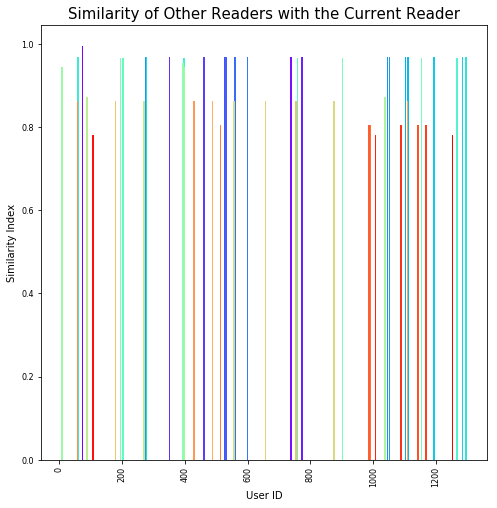

In [49]:
colors = cm.rainbow(np.linspace(0, 1, len(topUsers['userId'])))
plt.figure(figsize = (8, 8))
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("User ID", fontsize = 10)
plt.ylabel("Similarity Index", fontsize = 10)
plt.title("Similarity of Other Readers with the Current Reader", fontsize = 15)
plt.bar(topUsers['userId'], topUsers['similarityIndex'], color = colors, width = 5)

In [50]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='user_id', how='inner')    #Merging the dataframes topUsers and ratings_df
topUsersRating.head()

,similarityIndex,userId,user_id,book_id,rating
0,0.996116,75,75,3254,2
1,0.996116,75,75,6777,5
2,0.996116,75,75,11,5
3,0.996116,75,75,372,4
4,0.996116,75,75,476,3


In [51]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,user_id,book_id,rating,weightedRating
0,0.996116,75,75,3254,2,1.992233
1,0.996116,75,75,6777,5,4.980582
2,0.996116,75,75,11,5,4.980582
3,0.996116,75,75,372,4,3.984466
4,0.996116,75,75,476,3,2.988349


In [52]:
#Applies a sum to the topUsers after grouping it up by book_id
tempTopUsersRating = topUsersRating.groupby('book_id').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
book_id,,
1,45.573897,197.081815
2,45.573897,199.553426
3,23.423895,78.259077
4,22.463907,103.621456
5,28.081340,114.239555


In [53]:
#Creates an empty dataframe
recommendation_colabor_df = pd.DataFrame()
#Now we take the weighted average
recommendation_colabor_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_colabor_df['book_id'] = tempTopUsersRating.index
recommendation_colabor_df.head()

,weighted average recommendation score,book_id
book_id,,
1,4.324445,1
2,4.378678,2
3,3.340993,3
4,4.612798,4
5,4.068166,5


In [54]:
recommendation_colabor_df = recommendation_colabor_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_colabor_df.head(10)

,weighted average recommendation score,book_id
book_id,,
7898,5.0,7898
225,5.0,225
849,5.0,849
836,5.0,836
2967,5.0,2967
2965,5.0,2965
274,5.0,274
6729,5.0,6729
2959,5.0,2959


## Readers with similar taste also liked

In [55]:
final_colabor_df = books_df.loc[books_df['book_id'].isin(recommendation_colabor_df.head(10)['book_id'].tolist())]
final_colabor_df = final_colabor_df.reset_index()
final_colabor_df

,index,book_id,isbn,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,224,225,142000655,9.780142e+12,John Steinbeck,1952.0,East of Eden,eng,4.35,4183,9409,39153,96741,187196,https://images.gr-assets.com/books/1441547516m...,https://images.gr-assets.com/books/1441547516s...
1,273,274,451205766,9.780451e+12,"Mario Puzo, Robert Thompson, Peter Bart",1969.0,The Godfather,eng,4.36,2930,5985,30009,83730,147732,https://images.gr-assets.com/books/1394988109m...,https://images.gr-assets.com/books/1394988109s...
2,835,836,812993292,9.780813e+12,Rachel Joyce,2012.0,The Unlikely Pilgrimage of Harold Fry,eng,3.89,1925,6032,26242,48627,31050,https://images.gr-assets.com/books/1335816092m...,https://images.gr-assets.com/books/1335816092s...
3,847,848,345457374,9.780345e+12,Amy Tan,2001.0,The Bonesetter's Daughter,en-US,3.98,730,3502,23935,46287,30820,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4,848,849,60288140,9.780060e+12,Louise Rennison,1999.0,"Angus, Thongs and Full-Frontal Snogging",eng,3.74,4507,10953,31648,35061,36724,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5,2958,2959,375828788,9.780376e+12,Tamora Pierce,2004.0,Trickster's Queen,eng,4.28,379,1359,6900,14858,23980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6,2964,2965,553381652,9.780553e+12,Jean M. Auel,1990.0,The Plains of Passage,en-US,3.77,730,3581,12152,13945,11820,https://images.gr-assets.com/books/1324059606m...,https://images.gr-assets.com/books/1324059606s...
7,2966,2967,316159417,9.780316e+12,"Åsne Seierstad, Ingrid Christopherson",2002.0,Bokhandleren i Kabul,en-US,3.76,512,2168,9889,13752,7569,https://images.gr-assets.com/books/1388611939m...,https://images.gr-assets.com/books/1388611939s...
8,6728,6729,140065172,9.780140e+12,Judith Guest,1976.0,Ordinary People,eng,3.90,240,928,3815,6108,4759,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9,7897,7898,61730327,9.780062e+12,"William Kamkwamba, Bryan Mealer",2009.0,The Boy Who Harnessed the Wind: Creating Curre...,en-US,4.07,213,525,2626,6003,5387,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


### Visualization of average ratings of recommended books

<BarContainer object of 10 artists>

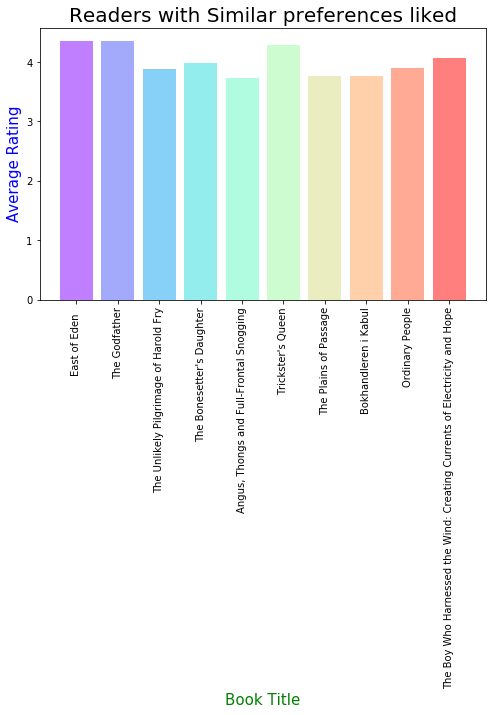

In [56]:
colors = cm.rainbow(np.linspace(0, 1, len(final_colabor_df['title'])))
plt.figure(figsize = (8,5))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Book Title", fontsize = 15, color = 'Green')
plt.ylabel("Average Rating", fontsize = 15, color = 'Blue')
plt.title("Readers with Similar preferences liked", fontsize = 20)
plt.bar(final_colabor_df['title'], final_colabor_df['average_rating'], color=colors, alpha = 0.5)

## List of books which similar readers liked

In [57]:
final_colabor = final_colabor_df['title'].to_list()
final_colabor        #List of books, suggested on the basis of choice of readers with similar preferences

['East of Eden  ',
 'The Godfather',
 'The Unlikely Pilgrimage of Harold Fry',
 "The Bonesetter's Daughter",
 'Angus, Thongs and Full-Frontal Snogging',
 "Trickster's Queen",
 'The Plains of Passage',
 'Bokhandleren i Kabul',
 'Ordinary People',
 'The Boy Who Harnessed the Wind: Creating Currents of Electricity and Hope']

# Thank You! Hope this was useful..
# Have a great time reading books :)